<a href="https://www.kaggle.com/code/saijeevanbattiprolu/ml-assignment-1?scriptVersionId=259996762" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Machine Learning Assignment - I

**imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

### **(a) Loading the Dataset and making appropriate X matrix and y vector**

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')
X = df.drop('num', axis=1)
y = df['num']
X.shape

(920, 15)

**Basic Preprocessing**

In [3]:
X.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

Handling the null values

In [4]:
X.dropna(axis=1, thresh=0.5 * len(X), inplace=True)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

/tmp/ipykernel_13/745507245.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[col] = X[col].fillna(X[col].mode()[0])


Encoding the Categorical Values

In [5]:
# Identify categorical columns and apply one-hot encoding 
cat_cols = X.select_dtypes(include=['object', 'category']).columns

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X = X_encoded.copy()

In [6]:
X.head()

,id,age,trestbps,chol,fbs,thalch,exang,oldpeak,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping
0,1,63,145.0,233.0,True,150.0,False,2.3,True,False,False,False,False,False,True,False,False,False,False
1,2,67,160.0,286.0,False,108.0,True,1.5,True,False,False,False,False,False,False,False,False,True,False
2,3,67,120.0,229.0,False,129.0,True,2.6,True,False,False,False,False,False,False,False,False,True,False
3,4,37,130.0,250.0,False,187.0,False,3.5,True,False,False,False,False,True,False,True,False,False,False
4,5,41,130.0,204.0,False,172.0,False,1.4,False,False,False,False,True,False,False,False,False,False,True


Scaling the values

In [7]:
standScale = StandardScaler()
X_scaled = standScale.fit_transform(X)
X = X_scaled.copy()


### **(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which willbe used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).**


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### **(c) Give the objective of logistic regression with L2 regularization.**

#### Logistic Regression with L2 Regularization

- Logistic regression is a **classification algorithm** that predicts the probability of a binary outcome \(y \in \{0,1\}\) given input features \(X\).
- It models the probability using the **sigmoid function**
- Logistic regression can **overfit** when there are:
  - Many features
  - Highly correlated features
  - Small datasets
- Overfitting leads to **large weights** that fit the training data well but **perform poorly on unseen data**.

- **L2 regularization** adds a **penalty term proportional to the square of the weight magnitudes**.
- 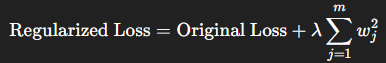
- λ = regularization parameter controlling penalty strength
- Combined formulae with the cross-entropy loss is:
- 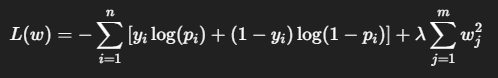
-  The model now **minimizes both the logistic loss and the magnitude of weights**.
- Helps in **reducing overfitting** and improving **generalization**.
- **Objective:** Minimize the regularized loss to **fit data while keeping weights small**, reducing overfitting.


### **(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.**

#### Regularization Parameter (λ)
   * The regularization strength is controlled using different values of **λ**:
   * As **λ increases**, the regularization becomes **stronger** — meaning the model penalizes large weights more heavily to avoid overfitting.

#### Logistic Regression and Regularization
   * Unlike **Linear Regression**, where regularization is applied using `Ridge` (L2) and `Lasso` (L1) from `sklearn.linear_model`, 
   * In **Logistic Regression**, regularization is controlled via the `penalty` parameter.
   * Use the `penalty` parameter in `LogisticRegression`:
   * `'l2'` → L2 Regularization (Ridge)
   * `'l1'` → L1 Regularization (Lasso)
   * The regularization strength is set using the **`C` parameter**, where **C = 1/λ**; that mean A smaller `C` means stronger regularization.


- Several arrays are initialized to collect results from each model:
- `train_losses`: Cross-entropy loss on the training data
- `test_losses`: Cross-entropy loss on the test data
- `train_accuracy`: Accuracy on training data
- `test_accuracy`: Accuracy on test data
- `l2_norms`: L2 norm of the model weight vector
- `weights`: Model coefficient vectors


 The **logistic loss** (also called **cross-entropy loss**) is used to measure how well the model predicts probabilities:

```python
from sklearn.metrics import log_loss
log_loss(y_true, y_pred_prob)

In [9]:
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_losses, test_losses = [], []
l2_norms, weights = [], []
train_accuracy, test_accuracy = [], []

for val in lambdas:
    C = 10**12 if val == 0 else 1 / val
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))
    l2_norms.append(np.linalg.norm(model.coef_))
    weights.append(model.coef_.flatten())

weights = np.array(weights)

**Cross-entropy Loss vs λ**

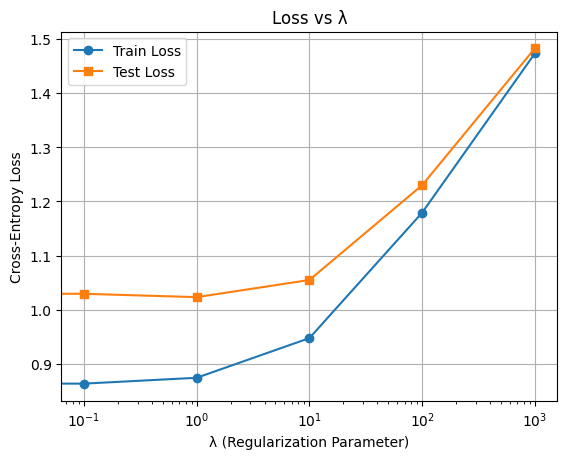

In [10]:
plt.figure()
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='s', label='Test Loss')
plt.xscale('log')
plt.xlabel('λ (Regularization Parameter)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss vs λ')
plt.grid(True)
plt.legend()
plt.show()

**L2 Norm vs λ(Regularization Parameter)**

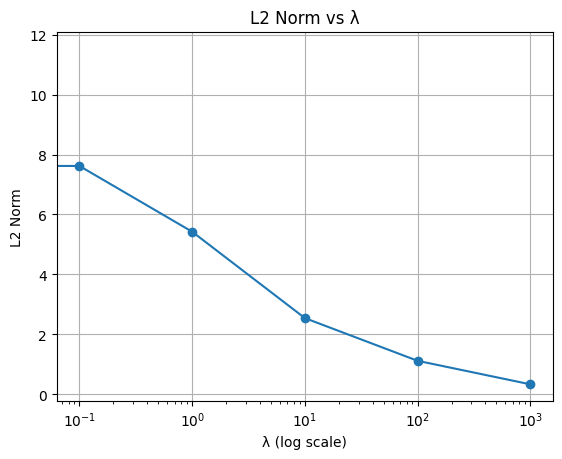

In [11]:
plt.figure()
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 Norm')
plt.title('L2 Norm vs λ')
plt.grid(True)
plt.show()

**Weights (w) vs λ**

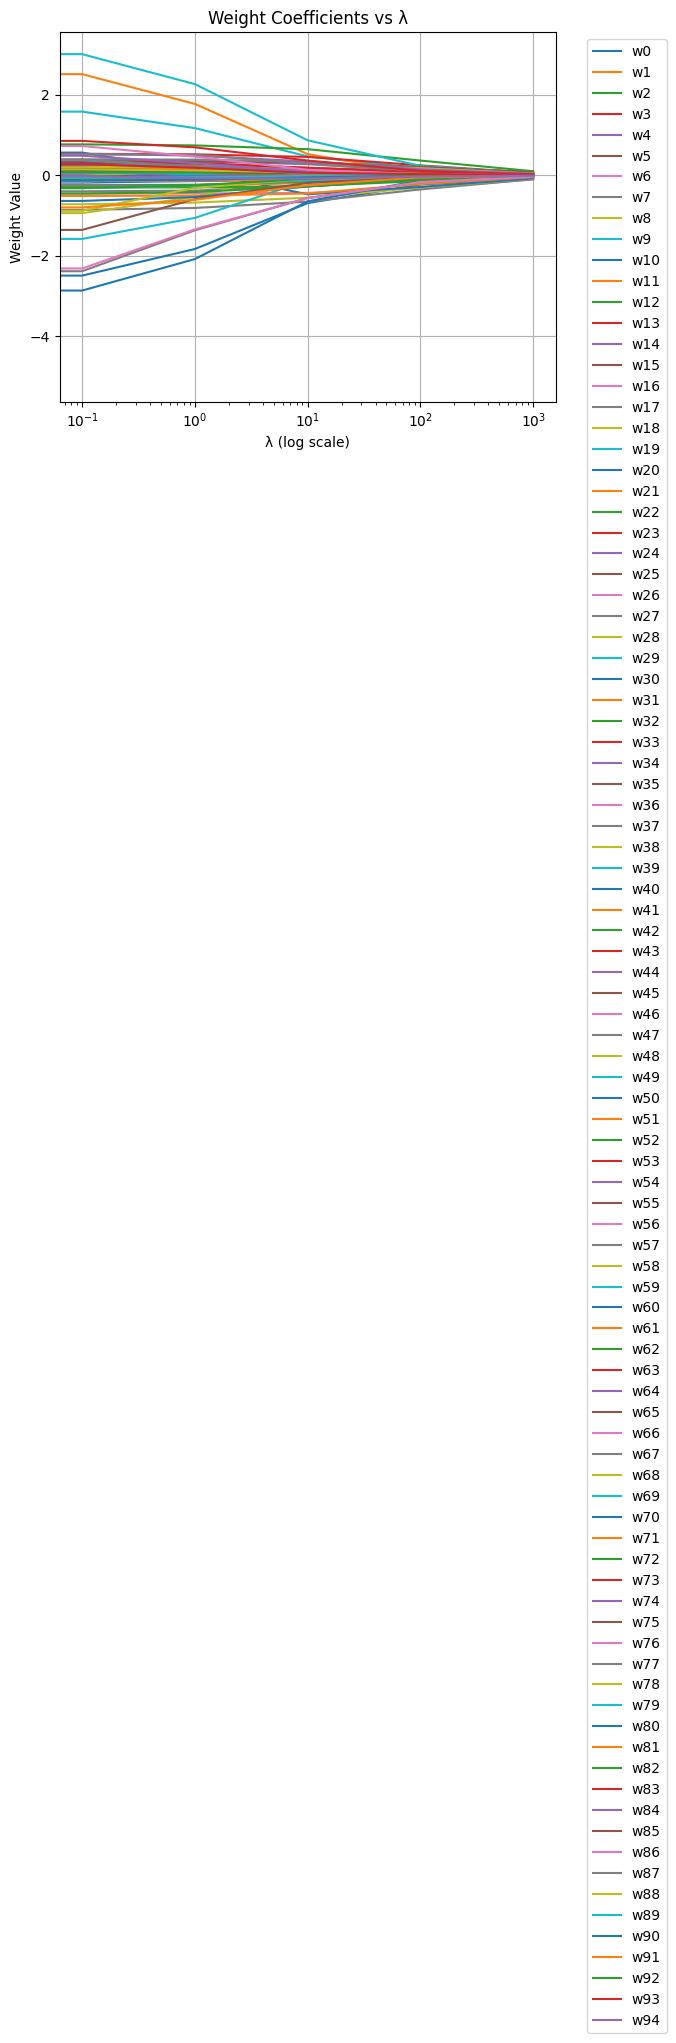

In [12]:
plt.figure()
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], label=f'w{i}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weight Coefficients vs λ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Accuracy vs λ**

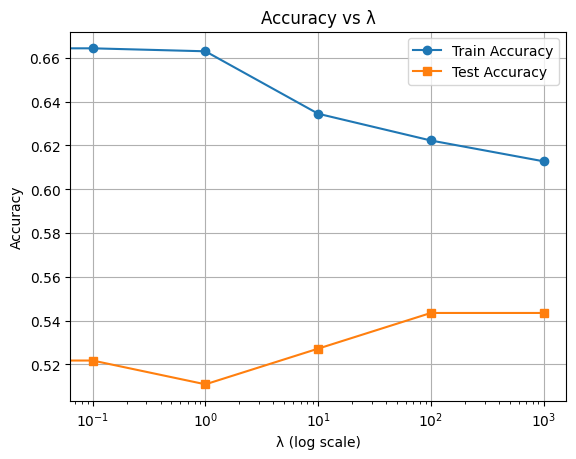

In [13]:
plt.figure()
plt.plot(lambdas, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_accuracy, marker='s', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs λ')
plt.grid(True)
plt.legend()
plt.show()
